# Import das bibliotecas

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from pygmo import *
from scipy.stats import wilcoxon
from mpl_toolkits.mplot3d import Axes3D
import methods_updated as mt
%matplotlib inline

## Funções

In [2]:
def read_execution_times(file_path):
    file = open(file_path, 'r')
    file_lines = file.readlines()
    
    return [int(time) for time in file_lines]

def plot_hypervolume_convergence(file_path, folder, file, dimension, reference_point=None, plot=True):
    number_of_executions = 21
    file_path = file_path
    hv_df = pd.DataFrame()

    for i in range(number_of_executions):
        file_name = file + str(i) + '.txt'

        f = open(os.path.join(file_path, folder, file_name),'r',encoding='utf-8')
#         print(os.path.join(file_path, folder, file_name))
        data = f.readlines()
        splitted_data = ' '.join([i for i in data]).split('#\n')
        splitted_data = [i for i in splitted_data if len(i) > 1]

        hv_pareto = []
        indexes = []
        for k in range(len(splitted_data)):
            converted = [i.strip().split(',') for i in splitted_data[k].split('\n') if len(i) > 1]
            pop = [[float(j) for j in i] for i in converted]
            hv = hypervolume(pop)
            if reference_point is None:
                hv_pareto.append(hv.compute([200000,150000,150000,150000,150000,150000,150000,1]))
            else:
                hv_pareto.append(hv.compute(reference_point))
            indexes.append(100*k)
        df = pd.DataFrame(data=[indexes, hv_pareto]).T
        columns_string = 'Evaluation HV'+str(i)
        df.columns = columns_string.split()
        hv_df = pd.concat([hv_df, df[columns_string.split()[1]]], axis=1, sort=False)
    if plot:
    	hv_df.T.mean().plot(x='Evaluation', y='HV',figsize=(10,8))
    return hv_df.T.mean(), hv_df

def random_test(df1, df2, number_of_samples=30, plot_hist = True, bins=60, name=None):
    DORAND = 5000
    
    spread2 = df2.values
    spread1 = df1.values
    
    medianSpreadDiff = np.median(spread2) - np.median(spread1)
    meanSpreadDiff = np.mean(spread2) - np.mean(spread1)
    
    totalSpread = np.append(spread1.tolist(), spread2.tolist())
    
    randMedianSpreadDiff = np.nan * np.ones((DORAND,1))
    randMeanSpreadDiff = np.nan * np.ones((DORAND,1))
    
    for randPool in range(0, DORAND-1):
        new1Index = np.random.permutation(number_of_samples)
        newSpread1 = totalSpread[new1Index[0:int(number_of_samples/2)]]
        newSpread2 = totalSpread[new1Index[int(number_of_samples/2):number_of_samples]]
        
        randMedianSpreadDiff[randPool] = np.median(newSpread2) - np.median(newSpread1)
        randMeanSpreadDiff[randPool] = np.mean(newSpread2) - np.mean(newSpread1)
        
    randMedianSpreadDiff[DORAND - 1] = medianSpreadDiff
    randMeanSpreadDiff[DORAND - 1] = meanSpreadDiff
    
    z = (meanSpreadDiff - np.mean(randMeanSpreadDiff) )/ np.std(randMeanSpreadDiff)
        
    limiar = 1.96 * np.std(randMeanSpreadDiff) + np.mean(randMeanSpreadDiff)
    
    if z <= -1.96:
        print('H1-')
    elif z >= 1.96:
        print('H1+')
    else:
        print('H0')
    print('Limiar =',limiar)
    print('z =',z)
    print('Mean Spread Diff',meanSpreadDiff)
    if plot_hist:
        plt.figure(figsize=(9,6))
        plt.hist(randMeanSpreadDiff, bins=bins, color='gray', label='Distribution')
        plt.plot([meanSpreadDiff], [0], color='black', marker='x', markersize=12, clip_on=False)
        plt.plot([limiar], [0], color='black', marker='o', markersize=12, clip_on=False)
        plt.plot([-limiar], [0], color='black', marker='o', markersize=12, clip_on=False)
        plt.scatter(x=meanSpreadDiff, y=0, color='black', marker='x', s=100, label='Observed Mean Difference')
        plt.scatter(x=limiar, y=0, color='black', s=100, label='Confidence Limiars (95%)')
        plt.xticks(fontsize=(15))
        plt.yticks(fontsize=(15))
        plt.legend(fontsize = 'large')
        if name is not None:
            fig = plt.gcf()
            plt.show()
            fig.savefig(name, format=name.split('.')[1])
        else:
            plt.show()

In [3]:
last_evaluation = 598

# 50 solicitações

In [4]:
instance = 'r050n12tw10k4'

# OnCl$\tau$-MOEA/D

In [5]:
file = 'onmoead_kendall-original-pareto-normalized-execution-'
time_file = 'onmoead_kendall-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'ONMOEAD_KENDALL'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
algorithm_name_1 = r'OnCL$\tau$-MOEA/D'
times_1 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_kendall_r050, hv_moead_kendall_r050_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# OnCl$\rho$-MOEA/D

In [6]:
file = 'onmoead_pearson-original-pareto-normalized-execution-'
time_file = 'onmoead_pearson-execution_times.csv'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'ONMOEAD_PEARSON'
algorithm_name_4 = r'OnCL$\rho$-MOEA/D'
times_4 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_pearson_r050, hv_moead_pearson_r050_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# Off-MOEA/D

In [7]:
file = 'moead_r2-original-pareto-normalized-execution-'
time_file = 'moead_r2-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'MOEAD_R2'
algorithm_name_2 = 'Off-MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2'
times_2 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r2_r050, hv_moead_r2_r050_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# MOEA/D

In [8]:
file = 'moead_r8-original-pareto-normalized-execution-'
time_file = 'moead_r8-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.15, 1.1, 1.1, 1.13, 1.1]
algorithm_folder = 'MOEAD_R8'
algorithm_name_3 = 'MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8'
times_3 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r8_r050, hv_moead_r8_r050_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# Boxplot do Hipervolume - 50 solicitações 

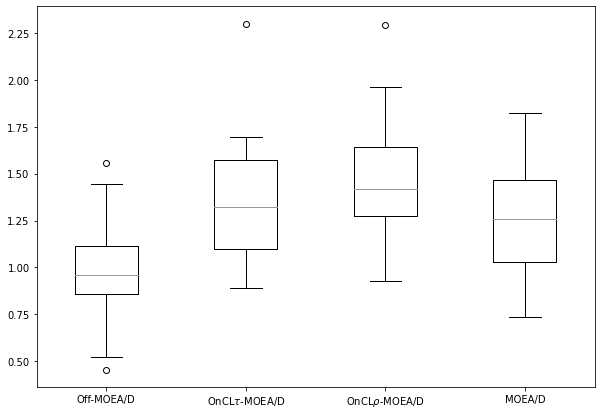

In [9]:
data_to_plot = [hv_moead_r2_r050_df.iloc[last_evaluation:].values.tolist()[0],
                hv_moead_kendall_r050_df.iloc[last_evaluation:].values.tolist()[0],
                hv_moead_pearson_r050_df.iloc[last_evaluation:].values.tolist()[0],
                hv_moead_r8_r050_df.iloc[last_evaluation:].values.tolist()[0],              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
fig = plt.gcf()
plt.show()
name = instance.split('n')[0] + '_boxplot_hypervolume.pdf'
fig.savefig(name, format=name.split('.')[1])

H1+
Limiar = 0.23881997724571488
z = 3.040402185191282
Mean Spread Diff 0.3696614683777869


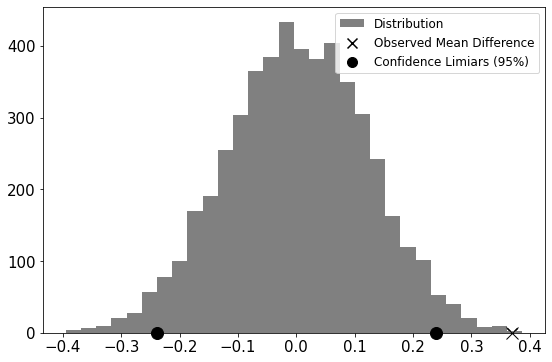

CPU times: user 2.03 s, sys: 168 ms, total: 2.2 s
Wall time: 2.22 s


In [10]:
%%time
random_test(hv_moead_r2_r050_df.iloc[last_evaluation],
               hv_moead_kendall_r050_df.iloc[last_evaluation],
               21,
               True,
               bins=30,
               name='off_kendall_r050.pdf')

H1+
Limiar = 0.24723401569351458
z = 3.7431341378770338
Mean Spread Diff 0.47321595538197847


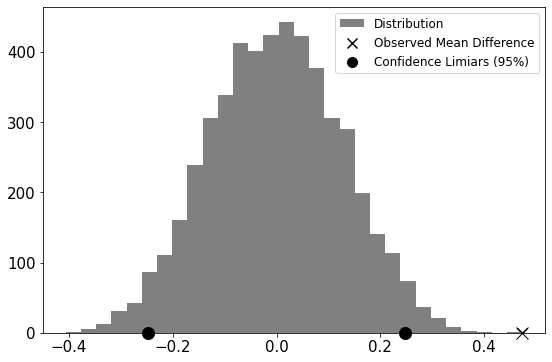

CPU times: user 2.05 s, sys: 152 ms, total: 2.2 s
Wall time: 1.95 s


In [11]:
%%time
random_test(hv_moead_r2_r050_df.iloc[last_evaluation],
               hv_moead_pearson_r050_df.iloc[last_evaluation],
               21,
               True,
               bins=30,
               name='off_pearson_r050.pdf')

H1+
Limiar = 0.2410868554385542
z = 2.241365197073031
Mean Spread Diff 0.275904743753277


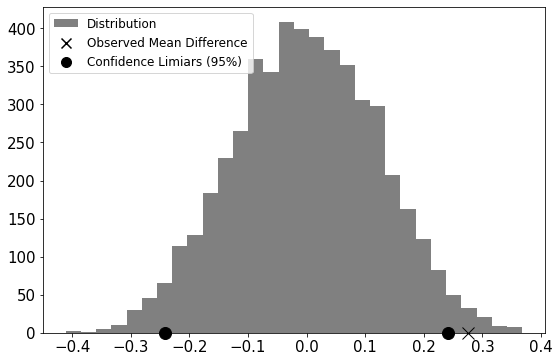

CPU times: user 2.13 s, sys: 153 ms, total: 2.28 s
Wall time: 2.02 s


In [12]:
%%time
random_test(hv_moead_r2_r050_df.iloc[last_evaluation],
               hv_moead_r8_r050_df.iloc[last_evaluation],
               21,
               True,
               bins=30,
               name='off_moead_r050.pdf')

H0
Limiar = 0.26775934736353146
z = 0.6742403311617585
Mean Spread Diff 0.0937567246245099


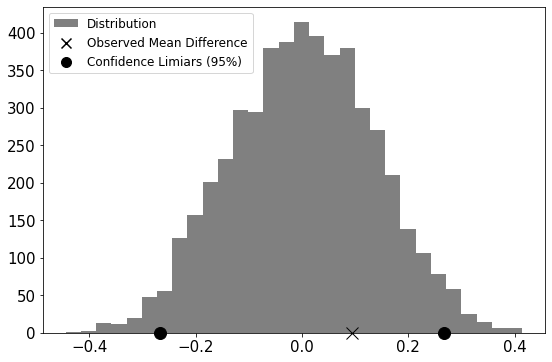

CPU times: user 2.06 s, sys: 140 ms, total: 2.2 s
Wall time: 1.94 s


In [13]:
%%time
random_test(hv_moead_r8_r050_df.iloc[last_evaluation],
               hv_moead_kendall_r050_df.iloc[last_evaluation],
               21,
               True,
               bins=30,
               name='moead_kendall_r050.pdf')

H0
Limiar = 0.2691401456821375
z = 1.440019597526589
Mean Spread Diff 0.19731121162870147


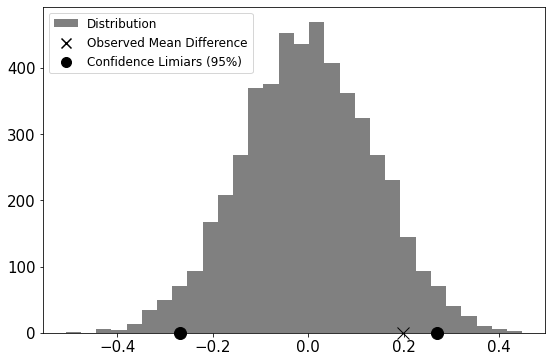

CPU times: user 1.97 s, sys: 172 ms, total: 2.14 s
Wall time: 1.88 s


In [14]:
%%time
random_test(hv_moead_r8_r050_df.iloc[last_evaluation],
               hv_moead_pearson_r050_df.iloc[last_evaluation],
               21,
               True,
               bins=30,
               name='moead_pearson_r050.pdf')

H0
Limiar = 0.28327727081411114
z = 0.7005018050158076
Mean Spread Diff 0.10355448700419156


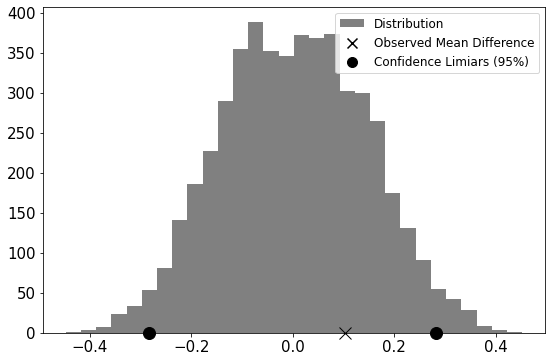

CPU times: user 2.03 s, sys: 149 ms, total: 2.17 s
Wall time: 1.92 s


In [15]:
%%time
random_test(hv_moead_kendall_r050_df.iloc[last_evaluation],
               hv_moead_pearson_r050_df.iloc[last_evaluation],
               21,
               True,
               bins=30,
               name='kendall_pearson_r050.pdf')

In [16]:
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
instance = 'r100n12tw10k4'

# OnCl$\tau$-MOEA/D

In [17]:
file = 'onmoead_kendall-original-pareto-normalized-execution-'
time_file = 'onmoead_kendall-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'ONMOEAD_KENDALL'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
algorithm_name_1 = r'OnCL$\tau$-MOEA/D'
times_1 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_kendall_r100, hv_moead_kendall_r100_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# OnCl$\rho$-MOEA/D

In [18]:
file = 'onmoead_pearson-original-pareto-normalized-execution-'
time_file = 'onmoead_pearson-execution_times.csv'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'ONMOEAD_PEARSON'
algorithm_name_4 = r'OnCL$\rho$-MOEA/D'
times_4 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_pearson_r100, hv_moead_pearson_r100_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# Off-MOEA/D

In [19]:
file = 'moead_r2-original-pareto-normalized-execution-'
time_file = 'moead_r2-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'MOEAD_R2'
algorithm_name_2 = 'Off-MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2'
times_2 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r2_r100, hv_moead_r2_r100_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# MOEA/D

In [20]:
file = 'moead_r8-original-pareto-normalized-execution-'
time_file = 'moead_r8-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.15, 1.1, 1.1, 1.13, 1.1]
algorithm_folder = 'MOEAD_R8'
algorithm_name_3 = 'MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8'
times_3 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r8_r100, hv_moead_r8_r100_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

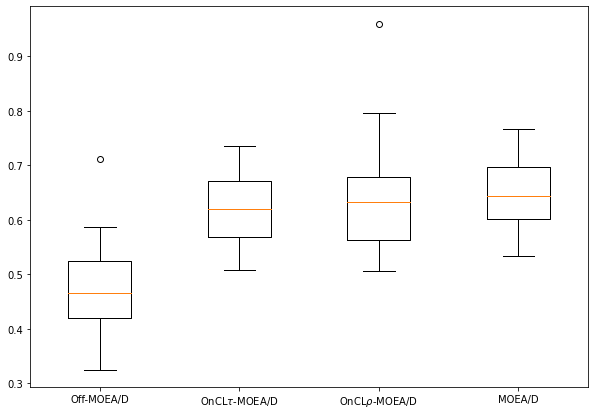

In [21]:
data_to_plot = [hv_moead_r2_r100_df.iloc[last_evaluation:].values.tolist()[0],
                hv_moead_kendall_r100_df.iloc[last_evaluation:].values.tolist()[0],
                hv_moead_pearson_r100_df.iloc[last_evaluation:].values.tolist()[0],
                hv_moead_r8_r100_df.iloc[last_evaluation:].values.tolist()[0],              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
fig = plt.gcf()
plt.show()
name = instance.split('n')[0] + '_boxplot_hypervolume.pdf'
fig.savefig(name, format=name.split('.')[1])

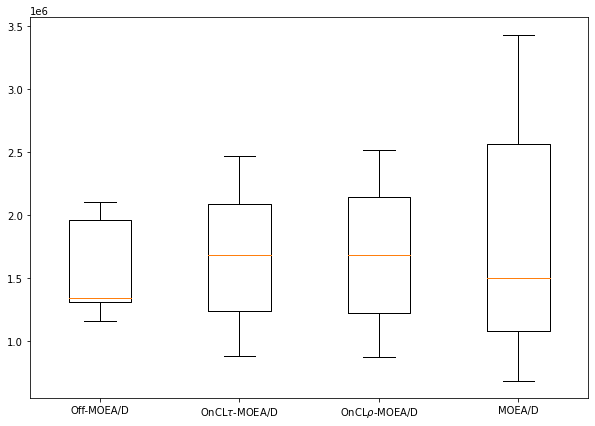

In [22]:
data_to_plot = [times_2,
                times_1,
                times_4,
                times_3,              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
plt.show()

H1+
Limiar = 0.07753695119626268
z = 3.7163375727446115
Mean Spread Diff 0.14750224524006111


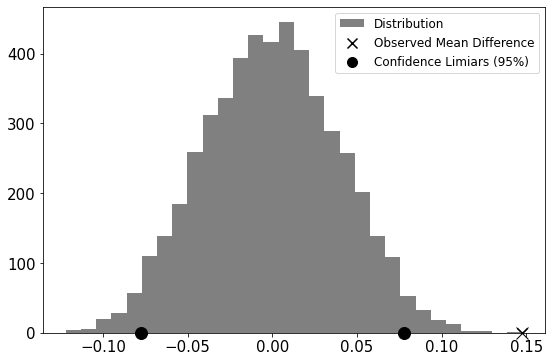

CPU times: user 2.29 s, sys: 124 ms, total: 2.41 s
Wall time: 2.27 s


In [23]:
%%time
random_test(hv_moead_r2_r100_df.iloc[last_evaluation],
               hv_moead_kendall_r100_df.iloc[last_evaluation],
               21,
               True,
               bins=30,
               name='off_kendall_r100.pdf')

H1+
Limiar = 0.07805979520201158
z = 3.4768088441732505
Mean Spread Diff 0.13796987668458366


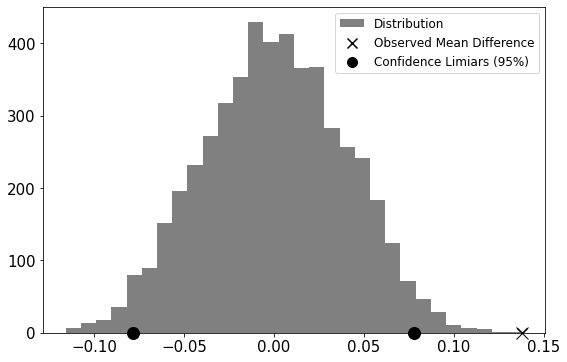

CPU times: user 2.25 s, sys: 144 ms, total: 2.4 s
Wall time: 2.28 s


In [24]:
%%time
random_test(hv_moead_r2_r100_df.iloc[599:],
               hv_moead_pearson_r100_df.iloc[599:],
               21,
               True,
               bins=30,
               name='off_pearson_r100.pdf')

H1+
Limiar = 0.07735587330246374
z = 4.358170718067106
Mean Spread Diff 0.1718041332986348


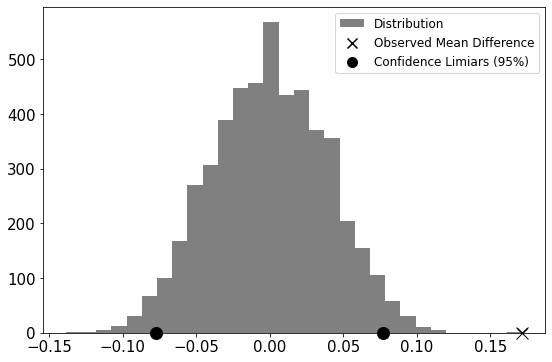

CPU times: user 2.14 s, sys: 140 ms, total: 2.28 s
Wall time: 2.09 s


In [25]:
%%time
random_test(hv_moead_r2_r100_df.iloc[599:],
               hv_moead_r8_r100_df.iloc[599:],
               21,
               True,
               bins=30,
               name='off_moead_r100.pdf')

H0
Limiar = 0.06523314488603335
z = -1.8887923498057546
Mean Spread Diff -0.061905281019089764


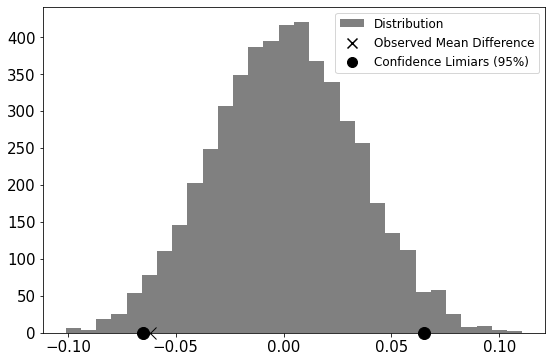

CPU times: user 2.02 s, sys: 140 ms, total: 2.16 s
Wall time: 1.9 s


In [26]:
%%time
random_test(hv_moead_r8_r100_df.iloc[599:],
               hv_moead_kendall_r100_df.iloc[599:],
               21,
               True,
               bins=30,
               name='moead_kendall_r100.pdf')

H0
Limiar = 0.0646299987669494
z = -1.0362564675094135
Mean Spread Diff -0.03383425661405115


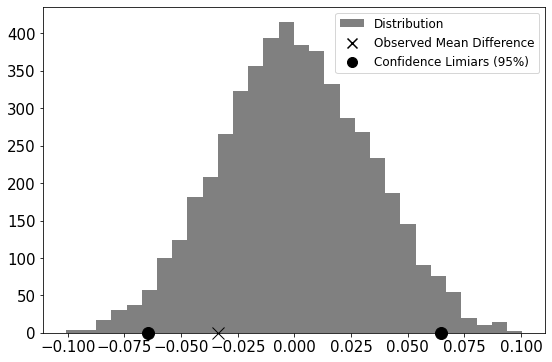

CPU times: user 2.15 s, sys: 172 ms, total: 2.32 s
Wall time: 2.06 s


In [27]:
%%time
random_test(hv_moead_r8_r100_df.iloc[599:],
               hv_moead_pearson_r100_df.iloc[599:],
               21,
               True,
               bins=30,
               name='moead_pearson_r100.pdf')

H0
Limiar = 0.06103806377660068
z = 0.8962582767729816
Mean Spread Diff 0.028071024405038614


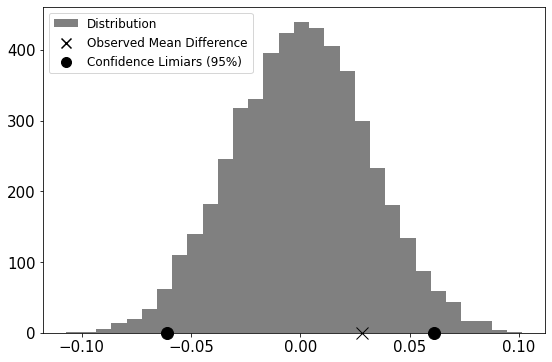

CPU times: user 1.99 s, sys: 184 ms, total: 2.17 s
Wall time: 1.91 s


In [28]:
%%time
random_test(hv_moead_kendall_r100_df.iloc[599:],
               hv_moead_pearson_r100_df.iloc[599:],
               21,
               True,
               bins=30,
               name='kendall_pearson_r100.pdf')

In [29]:
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
instance = 'r150n12tw10k4'

# OnCl$\tau$-MOEA/D

In [30]:
file = 'onmoead_kendall-original-pareto-normalized-execution-'
time_file = 'onmoead_kendall-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'ONMOEAD_KENDALL'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
algorithm_name_1 = r'OnCL$\tau$-MOEA/D'
times_1 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_kendall_r150, hv_moead_kendall_r150_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# OnCl$\rho$-MOEA/D

In [31]:
file = 'onmoead_pearson-original-pareto-normalized-execution-'
time_file = 'onmoead_pearson-execution_times.csv'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'ONMOEAD_PEARSON'
algorithm_name_4 = r'OnCL$\rho$-MOEA/D'
times_4 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_pearson_r150, hv_moead_pearson_r150_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# Off-MOEA/D

In [32]:
file = 'moead_r2-original-pareto-normalized-execution-'
time_file = 'moead_r2-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'MOEAD_R2'
algorithm_name_2 = 'Off-MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2'
times_2 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r2_r150, hv_moead_r2_r150_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# MOEA/D

In [33]:
file = 'moead_r8-original-pareto-normalized-execution-'
time_file = 'moead_r8-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.15, 1.1, 1.1, 1.13, 1.1]
algorithm_folder = 'MOEAD_R8'
algorithm_name_3 = 'MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8'
times_3 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r8_r150, hv_moead_r8_r150_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

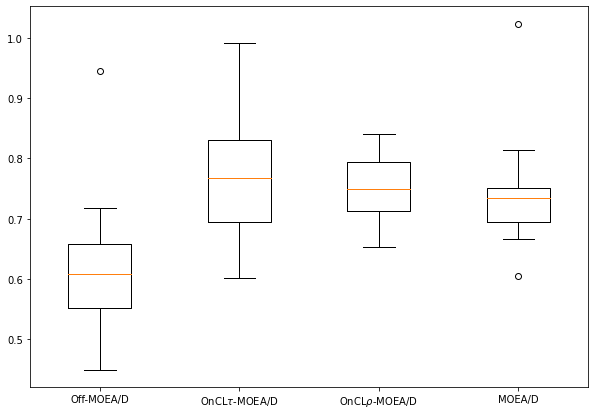

In [34]:
data_to_plot = [hv_moead_r2_r150_df.iloc[598:].values.tolist()[0],
                hv_moead_kendall_r150_df.iloc[598:].values.tolist()[0],
                hv_moead_pearson_r150_df.iloc[598:].values.tolist()[0],
                hv_moead_r8_r150_df.iloc[598:].values.tolist()[0],              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
fig = plt.gcf()
plt.show()
name = instance.split('n')[0] + '_boxplot_hypervolume.pdf'
fig.savefig(name, format=name.split('.')[1])

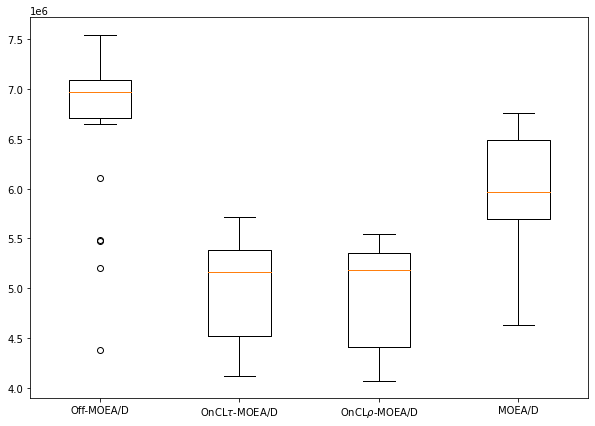

In [35]:
data_to_plot = [times_2,
                times_1,
                times_4,
                times_3,              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
plt.show()

H1+
Limiar = 0.08680720819770697
z = 3.0491240982785115
Mean Spread Diff 0.13504617394971452


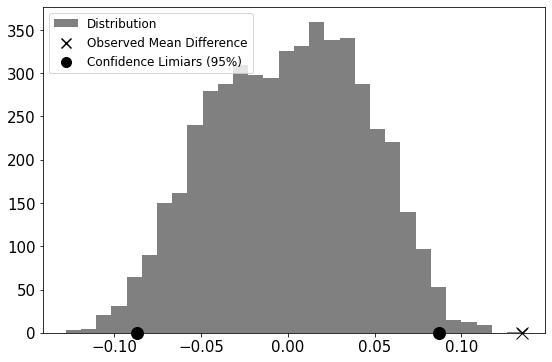

CPU times: user 2.02 s, sys: 160 ms, total: 2.18 s
Wall time: 1.92 s


In [36]:
%%time
random_test(hv_moead_r2_r150_df.iloc[599:],
               hv_moead_kendall_r150_df.iloc[599:],
               21,
               True,
               bins=30,
               name='off_kendall_r150.pdf')

H1+
Limiar = 0.08498647499290926
z = 2.2231648523212444
Mean Spread Diff 0.096535959454361


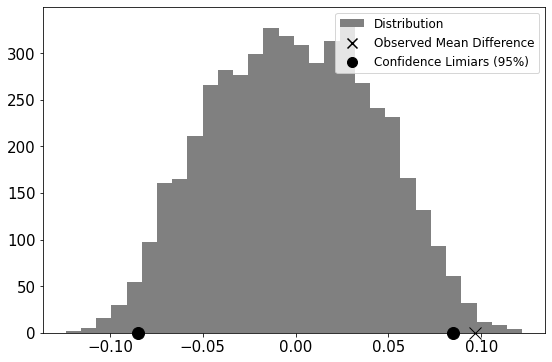

CPU times: user 2.14 s, sys: 164 ms, total: 2.31 s
Wall time: 2.05 s


In [37]:
%%time
random_test(hv_moead_r2_r150_df.iloc[599:],
               hv_moead_pearson_r150_df.iloc[599:],
               21,
               True,
               bins=30,
               name='off_pearson_r150.pdf')

H1+
Limiar = 0.08650078632500142
z = 2.8429325422250877
Mean Spread Diff 0.12553807770308656


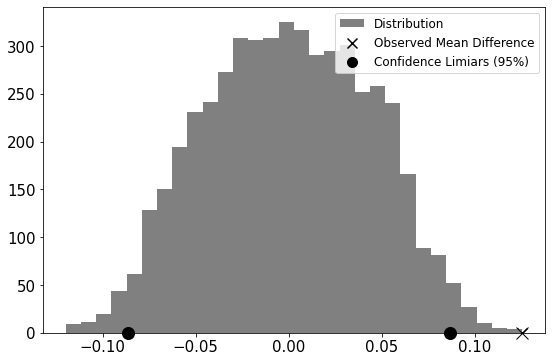

CPU times: user 2.1 s, sys: 168 ms, total: 2.27 s
Wall time: 2.01 s


In [38]:
%%time
random_test(hv_moead_r2_r150_df.iloc[599:],
               hv_moead_r8_r150_df.iloc[599:],
               21,
               True,
               bins=30,
               name='off_moead_r150.pdf')

H0
Limiar = 0.0679498213277292
z = 0.8606599811012464
Mean Spread Diff 0.029657800301605586


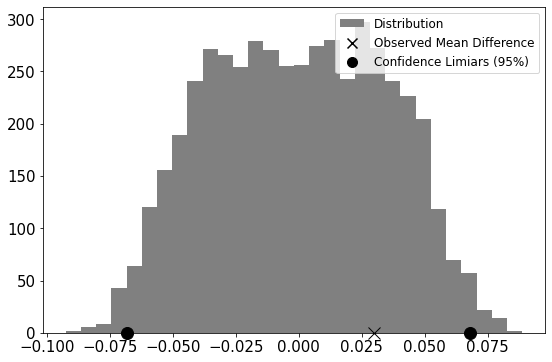

CPU times: user 2.03 s, sys: 180 ms, total: 2.21 s
Wall time: 1.95 s


In [39]:
%%time
random_test(hv_moead_r8_r150_df.iloc[598],
               hv_moead_kendall_r150_df.iloc[598],
               21,
               True,
               bins=30,
               name='moead_kendall_r150.pdf')

H0
Limiar = 0.06879427905884941
z = 0.17903193091076566
Mean Spread Diff 0.006072586891984977


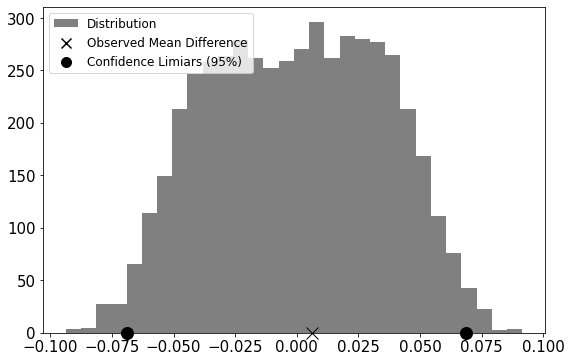

CPU times: user 2.37 s, sys: 176 ms, total: 2.54 s
Wall time: 2.37 s


In [40]:
%%time
random_test(hv_moead_r8_r150_df.iloc[598],
               hv_moead_pearson_r150_df.iloc[598],
               21,
               True,
               bins=30,
               name='moead_pearson_r150.pdf')

H0
Limiar = 0.08596831573125127
z = -0.6856499814523482
Mean Spread Diff -0.031047713952487066


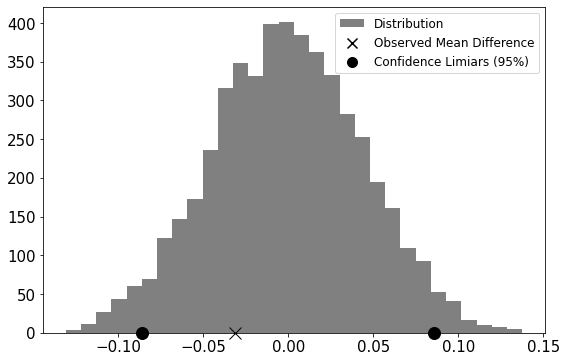

CPU times: user 2.21 s, sys: 76.4 ms, total: 2.29 s
Wall time: 2.23 s


In [41]:
%%time
random_test(hv_moead_kendall_r150_df.iloc[598:],
               hv_moead_pearson_r150_df.iloc[598:],
               21,
               True,
               bins=30,
               name='kendall_pearson_r150.pdf')

In [42]:
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
instance = 'r200n12tw10k4'

# OnCl$\tau$-MOEA/D

In [43]:
file = 'onmoead_kendall-original-pareto-normalized-execution-'
time_file = 'onmoead_kendall-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'ONMOEAD_KENDALL'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
algorithm_name_1 = r'OnCL$\tau$-MOEA/D'
times_1 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_kendall_r200, hv_moead_kendall_r200_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# OnCl$\rho$-MOEA/D

In [44]:
file = 'onmoead_pearson-original-pareto-normalized-execution-'
time_file = 'onmoead_pearson-execution_times.csv'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'ONMOEAD_PEARSON'
algorithm_name_4 = r'OnCL$\rho$-MOEA/D'
times_4 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_pearson_r200, hv_moead_pearson_r200_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# Off-MOEA/D

In [45]:
file = 'moead_r2-original-pareto-normalized-execution-'
time_file = 'moead_r2-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'MOEAD_R2'
algorithm_name_2 = 'Off-MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2'
times_2 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r2_r200, hv_moead_r2_r200_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# MOEA/D

In [46]:
file = 'moead_r8-original-pareto-normalized-execution-'
time_file = 'moead_r8-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.15, 1.1, 1.1, 1.13, 1.1]
algorithm_folder = 'MOEAD_R8'
algorithm_name_3 = 'MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8'
times_3 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r8_r200, hv_moead_r8_r200_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

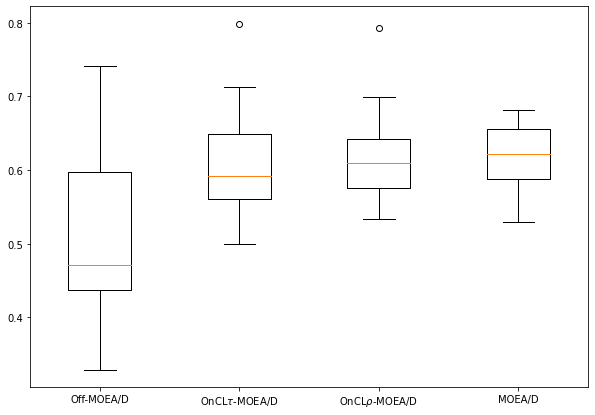

In [47]:
data_to_plot = [hv_moead_r2_r200_df.iloc[598:].values.tolist()[0],
                hv_moead_kendall_r200_df.iloc[598:].values.tolist()[0],
                hv_moead_pearson_r200_df.iloc[598:].values.tolist()[0],
                hv_moead_r8_r200_df.iloc[598:].values.tolist()[0],              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
fig = plt.gcf()
plt.show()
name = instance.split('n')[0] + '_boxplot_hypervolume.pdf'
fig.savefig(name, format=name.split('.')[1])

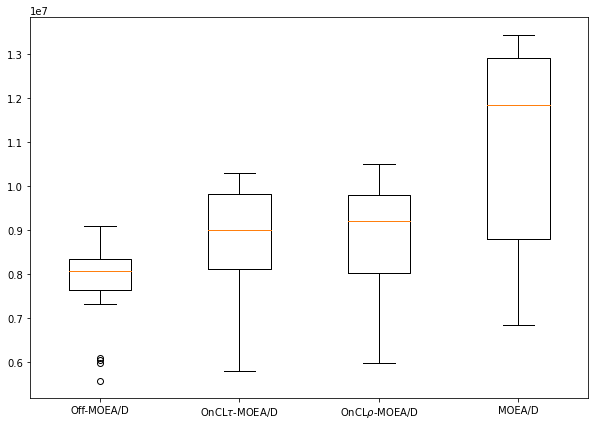

In [48]:
data_to_plot = [times_2,
                times_1,
                times_4,
                times_3,              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
plt.show()

H1+
Limiar = 0.09792969663469409
z = 2.0262573825750807
Mean Spread Diff 0.10123556517706134


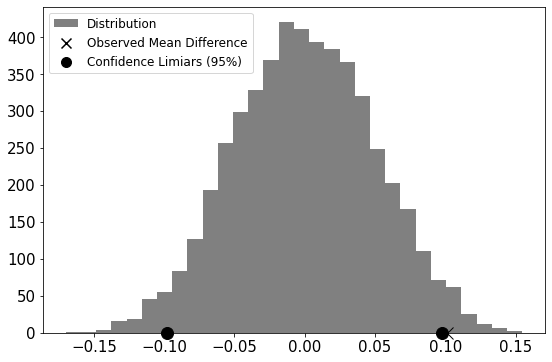

CPU times: user 1.93 s, sys: 156 ms, total: 2.09 s
Wall time: 1.83 s


In [49]:
%%time
random_test(hv_moead_r2_r200_df.iloc[598],
               hv_moead_kendall_r200_df.iloc[598],
               21,
               True,
               bins=30,
               name='off_kendall_r200.pdf')

In [50]:
hv_moead_r2_r200_df.iloc[598:].values.tolist()[0]

[0.37958439910107517,
 0.4584476162280708,
 0.4371743295737677,
 0.3516424159287416,
 0.3559124980140027,
 0.4573633886147521,
 0.5979406013580993,
 0.4502514527003125,
 0.5774205758189721,
 0.5468842344371536,
 0.5421318407604765,
 0.740638649546656,
 0.6425849682269427,
 0.32913743755910707,
 0.6202715818042928,
 0.47185942664723113,
 0.6001004718664632,
 0.44461159837779407,
 0.47058945872462843,
 0.6795403330627658,
 0.41001546897420804]

In [51]:
np.sort(hv_moead_r2_r200_df.iloc[598].values)

array([0.32913744, 0.35164242, 0.3559125 , 0.3795844 , 0.41001547,
       0.43717433, 0.4446116 , 0.45025145, 0.45736339, 0.45844762,
       0.47058946, 0.47185943, 0.54213184, 0.54688423, 0.57742058,
       0.5979406 , 0.60010047, 0.62027158, 0.64258497, 0.67954033,
       0.74063865])

In [52]:
np.sort(hv_moead_kendall_r200_df.iloc[598].values)

array([0.49945959, 0.49984067, 0.53342506, 0.53778981, 0.54786432,
       0.5603309 , 0.56207623, 0.57378607, 0.58775398, 0.58877773,
       0.59145024, 0.60216604, 0.61806368, 0.62076013, 0.63173568,
       0.6486332 , 0.65526606, 0.65917277, 0.65980218, 0.71302296,
       0.79887231])

H1+
Limiar = 0.09705103660568153
z = 2.312016235181227
Mean Spread Diff 0.1145081704786508


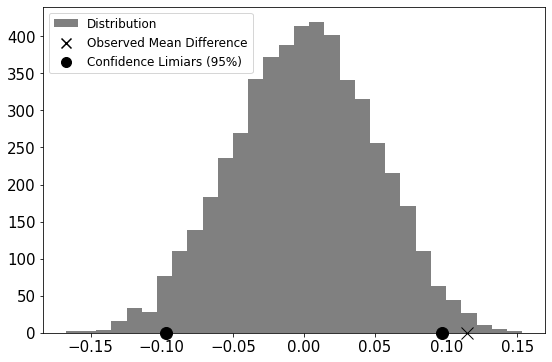

CPU times: user 1.95 s, sys: 180 ms, total: 2.13 s
Wall time: 1.92 s


In [53]:
%%time
random_test(hv_moead_r2_r200_df.iloc[598],
               hv_moead_pearson_r200_df.iloc[598],
               21,
               True,
               bins=30,
               name='off_pearson_r200.pdf')

H1+
Limiar = 0.09740864681229058
z = 2.2994469394344033
Mean Spread Diff 0.1142286453078789


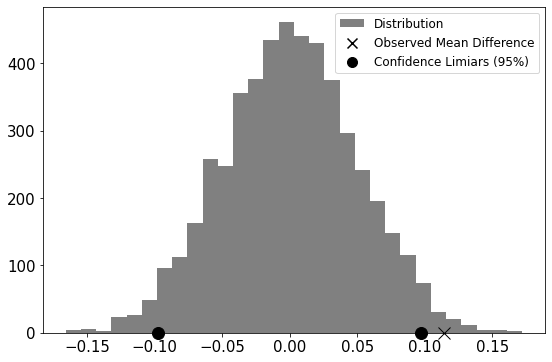

CPU times: user 2.03 s, sys: 116 ms, total: 2.15 s
Wall time: 2.02 s


In [54]:
%%time
random_test(hv_moead_r2_r200_df.iloc[598:],
               hv_moead_r8_r200_df.iloc[598:],
               21,
               True,
               bins=30,
               name='off_moead_r200.pdf')

H0
Limiar = 0.037312160793048325
z = -1.4597787413100143
Mean Spread Diff -0.027041101361296227


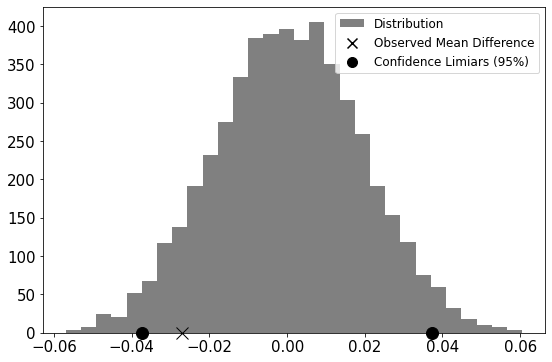

CPU times: user 2.13 s, sys: 164 ms, total: 2.29 s
Wall time: 2.04 s


In [55]:
%%time
random_test(hv_moead_r8_r200_df.iloc[598:],
               hv_moead_kendall_r200_df.iloc[598:],
               21,
               True,
               bins=30,
               name='moead_kendall_r200.pdf')

H0
Limiar = 0.03724261197297118
z = -1.0689669187297293
Mean Spread Diff -0.02052774395239243


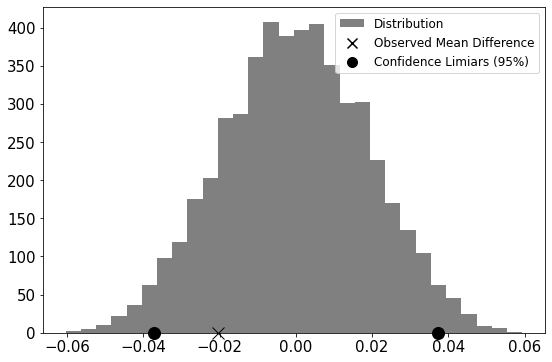

CPU times: user 1.97 s, sys: 196 ms, total: 2.17 s
Wall time: 1.91 s


In [56]:
%%time
random_test(hv_moead_r8_r200_df.iloc[598:],
               hv_moead_pearson_r200_df.iloc[598:],
               21,
               True,
               bins=30,
               name='moead_pearson_r200.pdf')

H0
Limiar = 0.061382983466346526
z = 0.42044698743858416
Mean Spread Diff 0.013272605301589468


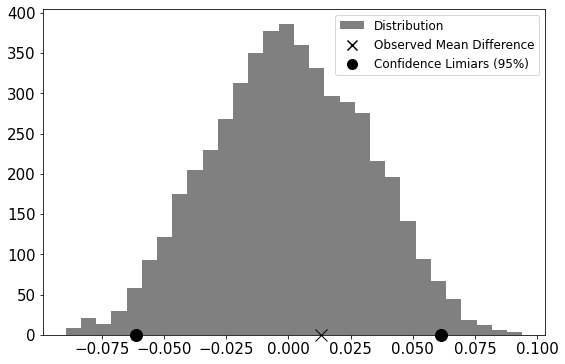

CPU times: user 2.06 s, sys: 120 ms, total: 2.18 s
Wall time: 1.92 s


In [57]:
%%time
random_test(hv_moead_kendall_r200_df.iloc[598],
               hv_moead_pearson_r200_df.iloc[598],
               21,
               True,
               bins=30,
               name='kendall_pearson_r200.pdf')

In [58]:
# stat, p = wilcoxon(hv_moead_kendall_r050_df.iloc[300:], hv_moead_pearson_r050_df.iloc[300:])
# print('Statistics=%.3f, p=%.3f' % (stat, p))

# alpha = 0.05
# if p > alpha:
# 	print('Same distribution (fail to reject H0)')
# else:
# 	print('Different distribution (reject H0)')

In [59]:
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
instance = 'r250n12tw10k4'

# OnCl$\tau$-MOEA/D

In [60]:
file = 'onmoead_kendall-original-pareto-normalized-execution-'
time_file = 'onmoead_kendall-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'ONMOEAD_KENDALL'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
algorithm_name_1 = r'OnCL$\tau$-MOEA/D'
times_1 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_kendall_r250, hv_moead_kendall_r250_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# OnCl$\rho$-MOEA/D

In [61]:
file = 'onmoead_pearson-original-pareto-normalized-execution-'
time_file = 'onmoead_pearson-execution_times.csv'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'ONMOEAD_PEARSON'
algorithm_name_4 = r'OnCL$\rho$-MOEA/D'
times_4 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_pearson_r250, hv_moead_pearson_r250_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# Off-MOEA/D

In [62]:
file = 'moead_r2-original-pareto-normalized-execution-'
time_file = 'moead_r2-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'MOEAD_R2'
algorithm_name_2 = 'Off-MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2'
times_2 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r2_r250, hv_moead_r2_r250_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

# MOEA/D

In [63]:
file = 'moead_r8-original-pareto-normalized-execution-'
time_file = 'moead_r8-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.15, 1.1, 1.1, 1.13, 1.1]
algorithm_folder = 'MOEAD_R8'
algorithm_name_3 = 'MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8'
times_3 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r8_r250, hv_moead_r8_r250_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=False)

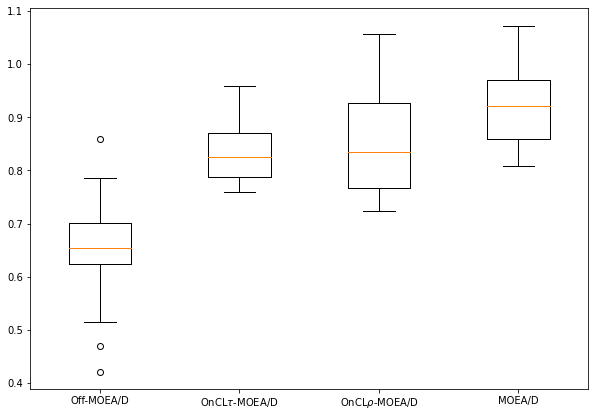

In [74]:
data_to_plot = [hv_moead_r2_r250_df.iloc[598:].values.tolist()[0],
                hv_moead_kendall_r250_df.iloc[598:].values.tolist()[0],
                hv_moead_pearson_r250_df.iloc[598:].values.tolist()[0],
                hv_moead_r8_r250_df.iloc[598:].values.tolist()[0],              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
fig = plt.gcf()
plt.show()
name = instance.split('n')[0] + '_boxplot_hypervolume.pdf'
fig.savefig(name, format=name.split('.')[1])

H1+
Limiar = 0.08699075273003964
z = 4.167509041328396
Mean Spread Diff 0.18467785834311934


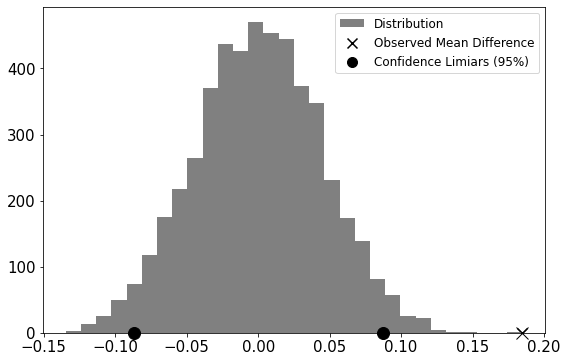

CPU times: user 2.09 s, sys: 144 ms, total: 2.24 s
Wall time: 1.98 s


In [75]:
%%time
random_test(hv_moead_r2_r250_df.iloc[598],
               hv_moead_kendall_r250_df.iloc[598],
               21,
               True,
               bins=30,
               name='off_kendall_r250.pdf')

In [76]:
hv_moead_r2_r250_df.iloc[598:].values.tolist()[0]

[0.8597286086868251,
 0.6309229690759514,
 0.6241784736995313,
 0.6386012439185538,
 0.5954473213540031,
 0.6544186341586814,
 0.7206665108730685,
 0.7796357050213296,
 0.4700566938233305,
 0.42166080270080836,
 0.6966824009822736,
 0.6720968180356119,
 0.514782693254819,
 0.6625070211259856,
 0.6735734562153028,
 0.7856345296565905,
 0.6347145781588979,
 0.7000662109321043,
 0.6404103586388563,
 0.5887464472452979,
 0.7447632512726489]

In [67]:
np.sort(hv_moead_r2_r250_df.iloc[598].values)

array([0.4216608 , 0.47005669, 0.51478269, 0.58874645, 0.59544732,
       0.62417847, 0.63092297, 0.63471458, 0.63860124, 0.64041036,
       0.65441863, 0.66250702, 0.67209682, 0.67357346, 0.6966824 ,
       0.70006621, 0.72066651, 0.74476325, 0.77963571, 0.78563453,
       0.85972861])

In [68]:
np.sort(hv_moead_kendall_r250_df.iloc[598].values)

array([0.75845275, 0.77100372, 0.77188704, 0.77636373, 0.78245658,
       0.78816584, 0.80657153, 0.80917745, 0.81718328, 0.82231208,
       0.8254663 , 0.85219875, 0.85975115, 0.860801  , 0.86335051,
       0.87017799, 0.87057431, 0.89377605, 0.9006441 , 0.9284562 ,
       0.95875938])

H1+
Limiar = 0.08676800146843819
z = 4.316244315427009
Mean Spread Diff 0.19185222881201103


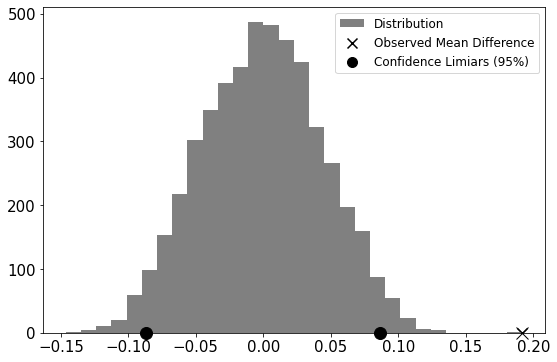

CPU times: user 2 s, sys: 164 ms, total: 2.17 s
Wall time: 1.91 s


In [69]:
%%time
random_test(hv_moead_r2_r250_df.iloc[598],
               hv_moead_pearson_r250_df.iloc[598],
               21,
               True,
               bins=30,
               name='off_pearson_r250.pdf')

H1+
Limiar = 0.08727363204434933
z = 6.0521693799569585
Mean Spread Diff 0.2686543257369134


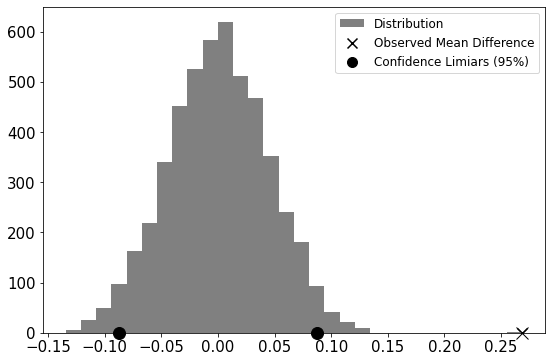

CPU times: user 1.99 s, sys: 172 ms, total: 2.17 s
Wall time: 1.91 s


In [70]:
%%time
random_test(hv_moead_r2_r250_df.iloc[598:],
               hv_moead_r8_r250_df.iloc[598:],
               21,
               True,
               bins=30,
               name='off_moead_r250.pdf')

H1-
Limiar = 0.060677239339636944
z = -3.191817492946741
Mean Spread Diff -0.09685347742121908


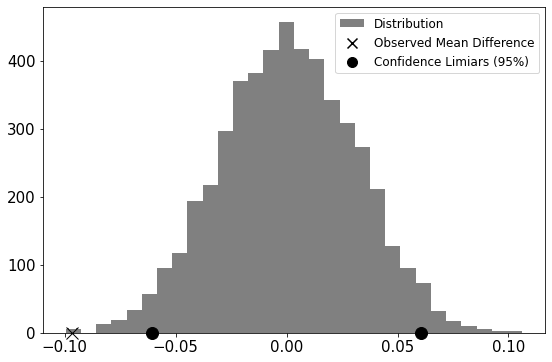

CPU times: user 2.01 s, sys: 156 ms, total: 2.16 s
Wall time: 1.9 s


In [77]:
%%time
random_test(hv_moead_r8_r250_df.iloc[598:],
               hv_moead_kendall_r250_df.iloc[598:],
               21,
               True,
               bins=30,
               name='moead_kendall_r250.pdf')

H1-
Limiar = 0.060421195471466134
z = -2.999642258942303
Mean Spread Diff -0.09423349542479142


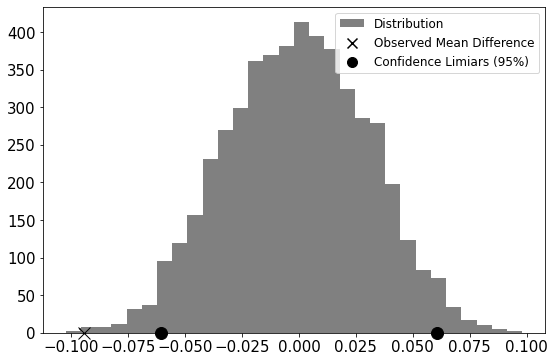

CPU times: user 2.09 s, sys: 172 ms, total: 2.26 s
Wall time: 2 s


In [78]:
%%time
random_test(hv_moead_r8_r250_df.iloc[598:],
               hv_moead_pearson_r250_df.iloc[598:],
               21,
               True,
               bins=30,
               name='moead_pearson_r250.pdf')

H0
Limiar = 0.0469776712763716
z = 0.30634292042014233
Mean Spread Diff 0.007174370468891689


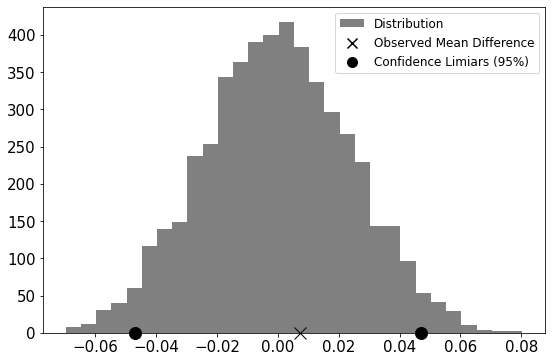

CPU times: user 2.11 s, sys: 180 ms, total: 2.29 s
Wall time: 2.03 s


In [80]:
%%time
random_test(hv_moead_kendall_r250_df.iloc[598],
               hv_moead_pearson_r250_df.iloc[598],
               21,
               True,
               bins=30,
               name='kendall_pearson_r250.pdf')